# CSC 578 Section 901 Spring 2020
# Final Project: Part A Kaggle Competition
# Name: Amy Aumpansub

## <font color = blue>Introduction</font>
The project is aimed to apply deep learning to develop a strong predictive model for weather forecasting using the time series data recorded by the Max-Planck-Institute for Biogeochemistry. Several models were developed and evaluate with validation set. The hyperparameters were adjusted in each model to examine their effect and improvement on model. The best model was selected regarding to their performance on loss convergence, overfitting, and time taken to build the model. 

## <font color = blue>Dataset</font>
The original time series weather dataset contains 70,037 records in which each record represent the weather variables recorded in each hour for 8 years from 01.01.2009 01:00:00 am to 01.01.2017 00:00:00 am. The dataset contains a datetime and 14 variables related to weather as shown on the table below. In order to perform the time series forcasting, 4 features: p (mbar), T (degC), rho (g/m^3), wd (deg) were extracted from the dataset. Then, the data were further transform in a form of 48-hour roll out with one target variable. The details were discuss after data exploration section. 


##  <font color = blue>Descriptions of Variables</font>
<img src = "t11.png"> 

## <font color = blue>Methodology</font>
The models were developed using deep learning algorithms: LSTM and Bidirectional LSTM. Several Python libraries such as Pandas, Matplotlib, NumPy, sklearn, and Keras, Tensorflow version 2.2 were utilized in this study. The following steps were implemented for this project:

• Explored the distribution and basic statistics and visualized data of all attributes

• Extracted 4 features:  p (mbar), T (degC), rho (g/m**3), wd (deg)

• Performed data stadardization using z-score

• Created X part (48 rorlling window (t-47, t)) and Y part (t+6)

• Divided data into a training data (48,000 rows) and a test set (21,984 rows) 

• Splitted the training data into 80% training set for fitting model and 20% validation set for evaluating model

• Developed models, adjusted hyperparmeters, and performed model evaluation using MAE loss

• Selected the best model and made a weather forcasting for the test set 


---

## <font color = blue>Data Exploration</font>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
print(tf.__version__)

2.1.0


In [3]:
series = pd.read_csv('./climate_hour.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


## <font color =blue> Basic Statistics</font>

In [4]:
series[['p (mbar)', 'T (degC)', 'rho (g/m**3)', 'wd (deg)']].describe()

,p (mbar),T (degC),rho (g/m**3),wd (deg)
count,70037.000000,70037.000000,70037.000000,70037.000000
mean,989.214407,9.441694,1216.101047,174.943301
std,8.360583,8.420257,39.964559,86.619521
min,918.500000,-22.760000,1066.190000,0.000000
25%,984.200000,3.350000,1187.560000,125.500000
50%,989.580000,9.410000,1213.850000,198.400000
75%,994.730000,15.460000,1242.850000,234.300000
max,1015.290000,37.280000,1392.560000,360.000000


The table ablove shows the statistics of 4 features:

• The range of p(mbar) is 918.50 - 1015.29 with the mean of 989.21. The standard deviation of p(mbar) is 8.36.

• The range of T(degC) is -22.76 - 37.28 with the mean of 9.44 Celcius. The standard deviation of T(degC) is 8.42.

• The range of rho (g/m^3) is 1066.19 - 1392.56 with the mean of 1216.10. The standard deviation of rho (g/m^3) is 39.96.

• The range of wd (deg) is 0 - 360 with the mean of 174.94. The standard deviation of wd (deg) is 86.61.

We will further examine the distribution from the time series plots and histograms in the following part.

---

## <font color =blue>Data Distribution</font>

As we will use only 4 features to build the network. We will further examine the pattern and distribution of thpse varaibles in details by creating time series plot and histograms.
<img src = "t2.png"> 

## a). Time Series Plots

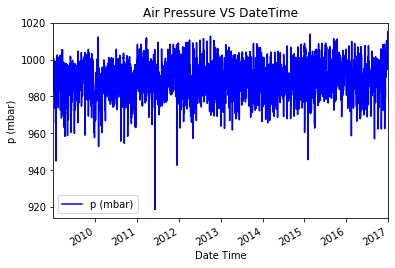

In [5]:
#Create Time series plot from 01/2009 to 31/2016
series['p (mbar)'].plot(color='blue')
plt.ylabel('p (mbar)')
plt.title('Air Pressure VS DateTime')
plt.legend()

The plot shows an obviously seasonal trend, in which the airpressure (p) ranges between 918.50 and 1015.29 with some noise (a sharp drop in pressure in the middle of 2011, 2012, and 2015).




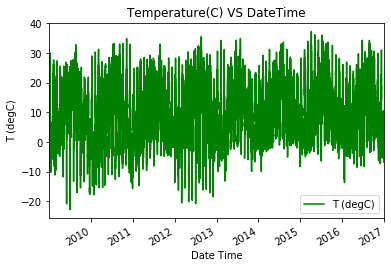

In [6]:
#Create Time series plot from 01/2009 to 31/2016
series['T (degC)'].plot(color='green')
plt.ylabel('T (degC)')
plt.title('Temperature(C) VS DateTime')
plt.legend()

The temperature (T) has a clear seasonal trend, which ranges between -22.76 and 37.28 with some noise (the middle of 2009 and 2012). Most data are aligned with the mean of 9.4 Celcuis.

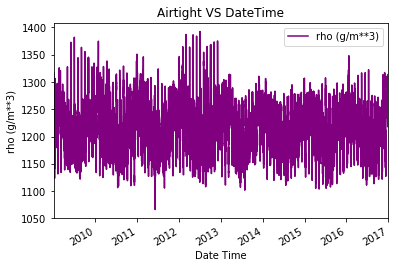

In [7]:
#Create Time series plot from 01/2009 to 31/2016
series['rho (g/m**3)'].plot(color='purple')
plt.ylabel('rho (g/m**3)')
plt.title('Airtight VS DateTime')
plt.legend()

The airtight (rho) plot has a seasonal trend as the values fluctuate in specific months. The rho value ranges between 1066.19 and 1392.56 with some noise (a sharp drop in the middle of 2011 and a shaep increase in 2009 and 2012).

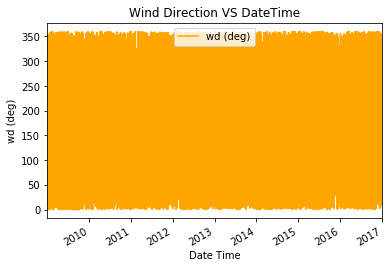

In [8]:
#Create Time series plot from 01/2009 to 31/2016
series['wd (deg)'].plot(color='orange')
plt.ylabel('wd (deg)')
plt.title('Wind Direction VS DateTime')
plt.legend()

The wind direction (wd) value ranges between 0 and 360 degree. The plot doesn't show a clear pattern, so we will plot the histrogram to check for the distribution

---

## b). Histograms

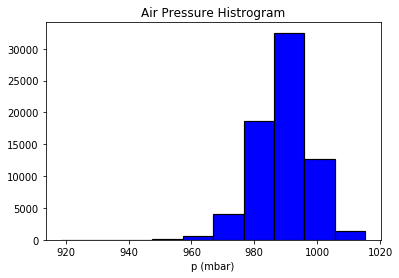

In [14]:
#Create Histogram to check distribution
series['p (mbar)'].hist(color='blue',  edgecolor='black', linewidth=1.2)
plt.xlabel('p (mbar)')
plt.title('Air Pressure Histrogram')
plt.grid(b=None)

The airpressure (p) ranges between 918.50 and 1015.29. The distribution is closed to normal with the high frequency around the mean of 989.

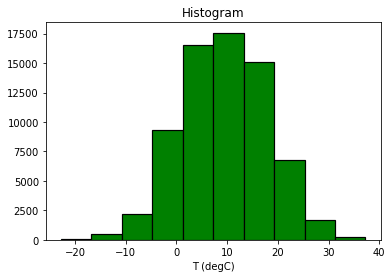

In [15]:
#Create Histogram to check distribution
series['T (degC)'].hist(color='green',  edgecolor='black', linewidth=1.2)
plt.xlabel('T (degC)')
plt.title('Histogram')
plt.grid(b=None)

The distribution is normal. The temperature (T) ranges between -22.76 and 37.28. Most data are aligned with the mean of 9.4 Celcuis. 

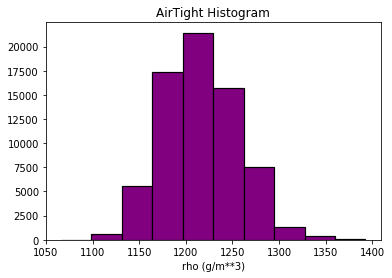

In [16]:
#Create Histogram to check distribution
series['rho (g/m**3)'].hist(color='purple',edgecolor='black', linewidth=1.2)
plt.xlabel('rho (g/m**3)')
plt.title('AirTight Histogram')
plt.grid(b=None)

The airtight (rho) distribution is closed to normal with ranges between 1066.19 and 1392.56.

No handles with labels found to put in legend.


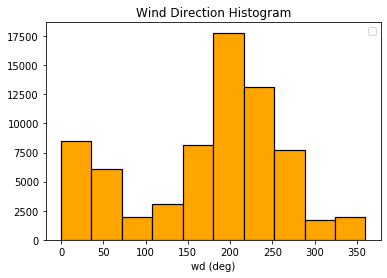

In [17]:
#Create Histogram to check distribution
series['wd (deg)'].hist(color='orange', edgecolor='black', linewidth=1.2)
plt.xlabel('wd (deg)')
plt.grid(b=None)
plt.title('Wind Direction Histogram')
plt.legend()

The wind direction (wd) has multimodal distribution with several peaks. The wd ranges between 0 and 360 degree.

---

## <font color = blue>Data Extraction</font>

Extract 4 features from the original dataset before performing data normalization

In [18]:
#Extract four features and saved to a new dataframe
mydata = pd.read_csv('./climate_hour.csv')
df = pd.DataFrame(mydata, index = None, columns = ['Date Time','p (mbar)', 'T (degC)', 'rho (g/m**3)', 'wd (deg)'])
df = df.set_index('Date Time')
df.head(5)

,p (mbar),T (degC),rho (g/m**3),wd (deg)
Date Time,,,,
01.01.2009 01:00:00,996.50,-8.05,1307.86,192.7
01.01.2009 02:00:00,996.62,-8.88,1312.25,190.3
01.01.2009 03:00:00,996.84,-8.81,1312.18,167.2
01.01.2009 04:00:00,996.99,-9.05,1313.61,240.0
01.01.2009 05:00:00,997.46,-9.63,1317.19,157.0


---

## <font color = blue>Data Standardization using Z score </font>

From the data exploration above, the data have to be normalized because all 4 features are on significantly different scales and contains some noises. Thus, each of 4 feature will be normalized using z-score, computed as: 

Standardized value = (value - mean)/(std)

In [19]:
#find mean of each feature
mean = df.mean()
print(mean)

p (mbar)         989.214407
T (degC)           9.441694
rho (g/m**3)    1216.101047
wd (deg)         174.943301
dtype: float64


In [20]:
#find standard diviation of each feature
std = df.std()
print(std)

p (mbar)         8.360583
T (degC)         8.420257
rho (g/m**3)    39.964559
wd (deg)        86.619521
dtype: float64


In [21]:
#Min-max normalization
normalized_df=(df-mean)/(std)
normalized_df.head(5)

,p (mbar),T (degC),rho (g/m**3),wd (deg)
Date Time,,,,
01.01.2009 01:00:00,0.871422,-2.077335,2.296008,0.204997
01.01.2009 02:00:00,0.885775,-2.175907,2.405855,0.177289
01.01.2009 03:00:00,0.912089,-2.167593,2.404104,-0.089394
01.01.2009 04:00:00,0.930030,-2.196096,2.439886,0.751063
01.01.2009 05:00:00,0.986246,-2.264978,2.529465,-0.207151


In [22]:
#Statistics after normarization
normalized_df.describe()

,p (mbar),T (degC),rho (g/m**3),wd (deg)
count,7.003700e+04,7.003700e+04,7.003700e+04,7.003700e+04
mean,1.462818e-13,-4.412926e-15,7.496437e-14,-1.293289e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.458071e+00,-3.824312e+00,-3.751100e+00,-2.019675e+00
25%,-5.997675e-01,-7.234570e-01,-7.141589e-01,-5.708101e-01
50%,4.372823e-02,-3.764014e-03,-5.632609e-02,2.708015e-01
75%,6.597140e-01,7.147414e-01,6.693168e-01,6.852578e-01
max,3.118873e+00,3.306111e+00,4.415386e+00,2.136432e+00


#### The table ablove shows the statistics of 4 features (Z-scores): All features have a standard divation of 1 and a mean of 0 which confirms the normalized data has a normal distribution. 

---

## <font color = blue>Create X and Y Parts</font>
X part 48 rolling window (t-47, t) and Y part (t+6)

In [23]:
#Save normalized values 
df_values = normalized_df.values
df_values[:5]

array([[ 0.87142167, -2.07733488,  2.29600812,  0.2049965 ],
       [ 0.88577474, -2.17590669,  2.40585545,  0.17728912],
       [ 0.91208869, -2.16759341,  2.4041039 , -0.08939441],
       [ 0.93003002, -2.1960961 ,  2.4398856 ,  0.75106279],
       [ 0.98624619, -2.2649776 ,  2.52946497, -0.20715078]])

In [24]:
#Create X, Y part using rolling window 
# X Part = 48 rolling window (t-47, t)) and Y part (t+6)
from numpy import array
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps #index for x
        end_iy = end_ix + 5 #index for y 
        if end_ix > len(sequence)-1:
            break
        if end_iy > len(sequence)-1:
            break
        seq_x =[]
        for row in sequence[i:end_ix]:
            seq_x.append(row.item(0))
            seq_x.append(row.item(1))
            seq_x.append(row.item(2))
            seq_x.append(row.item(3))
        seq_y = [sequence[end_iy][1]]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [25]:
X, y = split_sequence(df_values, 48)

In [26]:
X.shape

(69984, 192)

In [27]:
y.shape

(69984, 1)

---

# <font color = blue>Split Dataset</font>

### a.) Divided data into a training data (48,000 rows) and a test set (21,984 rows)

In [28]:
#Divided data for train/test sets
x_train_all = X[:48000]
y_train_all = y[:48000]

xtest = X[48000:]

### b.) Splitted the training data into 80% training set for fitting model and 20% validation set for evaluating model 

In [29]:
# 80% train, 20% validation, and by using stratefied sampling.  
from sklearn.model_selection import train_test_split
xtrain, xvalid, ytrain, yvalid = train_test_split(x_train_all, y_train_all,test_size=0.2, random_state=99)

### c.) ReShape for a correct dimesion

In [30]:
print(xtrain.shape)
print(ytrain.shape)
print(xvalid.shape)
print(yvalid.shape)

(38400, 192)
(38400, 1)
(9600, 192)
(9600, 1)


In [31]:
y_train = ytrain.reshape(len(ytrain[:,0]),)
y_valid = yvalid.reshape(len(yvalid[:,0]),)
x_train = xtrain.reshape((xtrain.shape[0], 48, 4))
x_valid = xvalid.reshape((xvalid.shape[0], 48, 4))
x_test = xtest.reshape((xtest.shape[0], 48, 4))

In [32]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(38400, 48, 4)
(38400,)
(9600, 48, 4)
(9600,)


---

## <font color = blue>Model Development and Hyperparameter Tuning</font>
The base model was developed with LSTM. One Hyperparmeter is tuned in each step and model evaluation using MAE loss was performed to check the improvement. The best model was selected regarding its performance on loss convergence, overfitting, and time taken to fit the model. The best model is in the last page. The best model was used to  forcast a weather for the test set and submitted the predicted value to Kaggle.

## a.) Baseline Model 

In [33]:
#Build the model 1
from keras.models import Sequential 
from keras.layers import *
from keras import optimizers
model1 = Sequential()
model1.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(48, 4)))
model1.add(LSTM(100, activation='relu'))
model1.add(Dense(1))
model1.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 48, 100)           42000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 122,501
Trainable params: 122,501
Non-trainable params: 0
_________________________________________________________________


In [21]:
#compile the model
model1.compile(optimizer='adam', loss='mae')
#fit 1model and save tranining results
history1 = model1.fit(x_train, y_train, batch_size =32,epochs=100, validation_data=(x_valid, y_valid))

Train on 38400 samples, validate on 9600 samples
Epoch 1/100
38400/38400 [==============================] - 82s 2ms/step - loss: 0.2700 - val_loss: 0.2055
Epoch 2/100
38400/38400 [==============================] - 80s 2ms/step - loss: 0.2063 - val_loss: 0.2071
Epoch 3/100
38400/38400 [==============================] - 80s 2ms/step - loss: 0.1959 - val_loss: 0.1888
Epoch 4/100
38400/38400 [==============================] - 81s 2ms/step - loss: 0.1913 - val_loss: 0.1954
Epoch 5/100
38400/38400 [==============================] - 81s 2ms/step - loss: 0.1850 - val_loss: 0.1915
Epoch 6/100
38400/38400 [==============================] - 80s 2ms/step - loss: 0.1807 - val_loss: 0.1870
Epoch 7/100
38400/38400 [==============================] - 81s 2ms/step - loss: 0.1774 - val_loss: 0.1739
Epoch 8/100
38400/38400 [==============================] - 81s 2ms/step - loss: 0.1736 - val_loss: 0.1839
Epoch 9/100
38400/38400 [==============================] - 81s 2ms/step - loss: 0.1707 - val_loss: 0.17

In [22]:
# Evaluate model
valid_loss1 = model1.evaluate(x_valid, y_valid) 
print ("valid_loss=%s" % (valid_loss1))

9600/9600 [==============================] - 5s 479us/step
valid_loss=0.07377413413176934


In [23]:
#make predictions
preds1= model1.predict(x_test)
preds1_renorm = (preds1*std[1]) + mean[1]

In [25]:
def plotLoss(history):
    plt.plot(history.history['loss'], label='train_loss') # For TF2
    plt.plot(history.history['val_loss'], label = 'valid_loss') # For TF2
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.ylim([0.0, 0.5])
    plt.legend(loc='lower right')

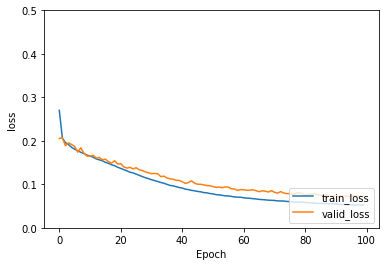

In [26]:
#Plot MAE Loss Graph
plotLoss(history1)

From the baseline model, the model starts to overfit and fluctuate after epoch 20, so we need to add dropout in the later experiments if we want to train the network longer.

## b.) Model 2 (add recurrent units)

In [71]:
##Build the model 2
from keras.models import Sequential 
from keras.layers import *
from keras import optimizers
model2 = Sequential()
model2.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(48, 4)))
model2.add(LSTM(256, activation='relu'))
model2.add(Dense(1))
model2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 48, 256)           267264    
_________________________________________________________________
lstm_16 (LSTM)               (None, 256)               525312    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
Total params: 792,833
Trainable params: 792,833
Non-trainable params: 0
_________________________________________________________________


In [73]:
#compile model2
model2.compile(optimizer='adam', loss='mae')
#fit model2 and save tranining results
history2 = model2.fit(x_train, y_train, batch_size =32,epochs=10, validation_data=(x_valid, y_valid))

Train on 38400 samples, validate on 9600 samples
Epoch 1/10
38400/38400 [==============================] - 480s 12ms/step - loss: 0.2253 - val_loss: 0.2017
Epoch 2/10
38400/38400 [==============================] - 473s 12ms/step - loss: 0.1971 - val_loss: 0.1859
Epoch 3/10
38400/38400 [==============================] - 472s 12ms/step - loss: 0.1882 - val_loss: 0.1826
Epoch 4/10
38400/38400 [==============================] - 485s 13ms/step - loss: 0.1824 - val_loss: 0.1833
Epoch 5/10
38400/38400 [==============================] - 502s 13ms/step - loss: 0.1764 - val_loss: 0.1835
Epoch 6/10
38400/38400 [==============================] - 503s 13ms/step - loss: 0.1719 - val_loss: 0.1696
Epoch 7/10
38400/38400 [==============================] - 515s 13ms/step - loss: 0.1680 - val_loss: 0.1637
Epoch 8/10
38400/38400 [==============================] - 503s 13ms/step - loss: 0.1641 - val_loss: 0.1635
Epoch 9/10
38400/38400 [==============================] - 471s 12ms/step - loss: 0.1606 - val_l

In [74]:
# Evaluate model 
valid_loss2 = model2.evaluate(x_valid, y_valid, verbose=1) 
print ("valid_loss=%s" % (valid_loss2))

9600/9600 [==============================] - 30s 3ms/step
valid_loss=0.1632179909447829


In [78]:
#make predictions
preds2= model2.predict(x_test)
preds2_renorm = (preds2*std[1]) + mean[1]

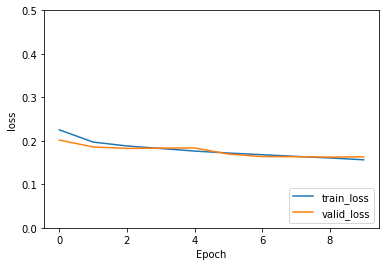

In [75]:
# Plot MAE Loss 
plotLoss(history2)

From the second model, the model with 256 units performs a little bit better than 100 units but takes 4 time longer. So, we will other options to improve the model such as adding layer wrapper Bidirection.

## c.) Model 3 (Add Bidirectional LSTM)

In [81]:
##Build, compile, and fit model 3
from keras.models import Sequential 
from keras.layers import *
from keras import optimizers
model3 = Sequential()
model3.add(Bidirectional(LSTM(256, return_sequences=True, input_shape=(48, 4))))
model3.add(Bidirectional(LSTM(256)))
model3.add(Dense(1))

In [83]:
model3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 48, 512)           534528    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 512)               1574912   
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 513       
Total params: 2,109,953
Trainable params: 2,109,953
Non-trainable params: 0
_________________________________________________________________


In [82]:
model3.compile(optimizer='adam', loss='mae')
history3 = model3.fit(x_train, y_train, batch_size =32,epochs=10, validation_data=(x_valid, y_valid))

Train on 38400 samples, validate on 9600 samples
Epoch 1/10
38400/38400 [==============================] - 1190s 31ms/step - loss: 0.2289 - val_loss: 0.2051
Epoch 2/10
38400/38400 [==============================] - 986s 26ms/step - loss: 0.2002 - val_loss: 0.1835
Epoch 3/10
38400/38400 [==============================] - 985s 26ms/step - loss: 0.1926 - val_loss: 0.1881
Epoch 4/10
38400/38400 [==============================] - 993s 26ms/step - loss: 0.1850 - val_loss: 0.1747
Epoch 5/10
38400/38400 [==============================] - 1002s 26ms/step - loss: 0.1800 - val_loss: 0.1846
Epoch 6/10
38400/38400 [==============================] - 973s 25ms/step - loss: 0.1754 - val_loss: 0.1794
Epoch 7/10
38400/38400 [==============================] - 974s 25ms/step - loss: 0.1708 - val_loss: 0.1702
Epoch 8/10
38400/38400 [==============================] - 975s 25ms/step - loss: 0.1676 - val_loss: 0.1681
Epoch 9/10
38400/38400 [==============================] - 978s 25ms/step - loss: 0.1631 - val

In [84]:
# Evaluate model 
valid_loss3 = model3.evaluate(x_valid, y_valid, verbose=1) 
print ("valid_loss=%s" % (valid_loss3))

9600/9600 [==============================] - 74s 8ms/step
valid_loss=0.16316604390740394


In [87]:
#make predictions
preds3= model3.predict(x_test)
preds3_renorm = (preds3*std[1]) + mean[1]

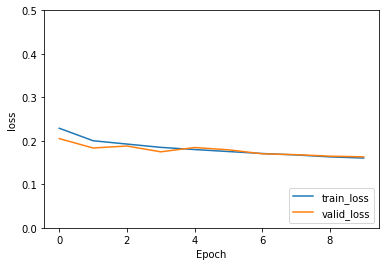

In [85]:
# Plot MAE Loss 
plotLoss(history3)

From the third model, the model with performs a better with BLSTM. So, we will use it to improve the modeland will will add the dropout in the next expirement to solve the overfitting problem. 

## d.) Model 4 (Add dropout)

In [91]:
##Build, compile, and fit model 3
from keras.models import Sequential 
from keras.layers import *
from keras import optimizers
model4 = Sequential()
model4.add(Bidirectional(LSTM(256, return_sequences=True, input_shape=(48, 4))))
model4.add(Bidirectional(LSTM(256)))
model4.add(Dropout(0.15))
model4.add(Dense(1))
model4.compile(optimizer='adam', loss='mae')

In [93]:
model4.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_5 (Bidirection (None, 48, 512)           534528    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 512)               1574912   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 513       
Total params: 2,109,953
Trainable params: 2,109,953
Non-trainable params: 0
_________________________________________________________________


In [92]:
history4 = model4.fit(x_train, y_train, batch_size =32,epochs=10, validation_data=(x_valid, y_valid))

Train on 38400 samples, validate on 9600 samples
Epoch 1/10
38400/38400 [==============================] - 1027s 27ms/step - loss: 0.2392 - val_loss: 0.1981
Epoch 2/10
38400/38400 [==============================] - 971s 25ms/step - loss: 0.2075 - val_loss: 0.2106
Epoch 3/10
38400/38400 [==============================] - 972s 25ms/step - loss: 0.1986 - val_loss: 0.2004
Epoch 4/10
38400/38400 [==============================] - 972s 25ms/step - loss: 0.1927 - val_loss: 0.1828
Epoch 5/10
38400/38400 [==============================] - 972s 25ms/step - loss: 0.1867 - val_loss: 0.1851
Epoch 6/10
38400/38400 [==============================] - 975s 25ms/step - loss: 0.1821 - val_loss: 0.1736
Epoch 7/10
38400/38400 [==============================] - 977s 25ms/step - loss: 0.1793 - val_loss: 0.1760
Epoch 8/10
38400/38400 [==============================] - 977s 25ms/step - loss: 0.1771 - val_loss: 0.1685
Epoch 9/10
38400/38400 [==============================] - 974s 25ms/step - loss: 0.1721 - val_

In [94]:
# Evaluate model 
valid_loss4 = model4.evaluate(x_valid, y_valid, verbose=1) 
print ("valid_loss=%s" % (valid_loss4))

9600/9600 [==============================] - 75s 8ms/step
valid_loss=0.16575005042056243


In [96]:
#make predictions
preds4= model4.predict(x_test)
preds4_renorm = (preds4*std[1]) + mean[1]

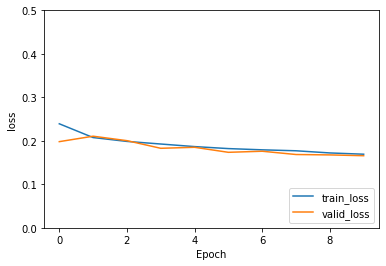

In [95]:
plotLoss(history4)

From the forth model, the model with performs a better with BLSTM and dropout. The 256 units performs well but requires much time to fit one epoch so it is not suitable to train with longer process (100 epochs). So, we will build on this model. To improve the model and we will add the dropout after each layer and reduce units in the next expirement to solve the overfitting problem. We will train the network longer to 100 epochs.

## e.) The Best Model

In [18]:
##Build, compile, and fit model 3
from keras.models import Sequential 
from keras.layers import *
from keras import optimizers
model5 = Sequential()
model5.add(Bidirectional(LSTM(150, activation='relu', return_sequences=True, input_shape=(48, 4))))
model5.add(Dropout(0.15))
model5.add(Bidirectional(LSTM(150, activation='relu')))
model5.add(Dropout(0.15))
model5.add(Dense(1))
model5.compile(optimizer='adam', loss='mae')

Using TensorFlow backend.


In [21]:
model5.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 48, 300)           186000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 300)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 300)               541200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 301       
Total params: 727,501
Trainable params: 727,501
Non-trainable params: 0
_________________________________________________________________


In [20]:
history5 = model5.fit(x_train, y_train, batch_size =32,epochs=100, validation_data=(x_valid, y_valid))

Train on 38400 samples, validate on 9600 samples
Epoch 1/100
38400/38400 [==============================] - 306s 8ms/step - loss: 0.2629 - val_loss: 0.2100
Epoch 2/100
38400/38400 [==============================] - 295s 8ms/step - loss: 0.2158 - val_loss: 0.1991
Epoch 3/100
38400/38400 [==============================] - 313s 8ms/step - loss: 0.2027 - val_loss: 0.1949
Epoch 4/100
38400/38400 [==============================] - 302s 8ms/step - loss: 0.1967 - val_loss: 0.1805
Epoch 5/100
38400/38400 [==============================] - 301s 8ms/step - loss: 0.1916 - val_loss: 0.1753
Epoch 6/100
38400/38400 [==============================] - 303s 8ms/step - loss: 0.1869 - val_loss: 0.1775
Epoch 7/100
38400/38400 [==============================] - 322s 8ms/step - loss: 0.1825 - val_loss: 0.1722
Epoch 8/100
38400/38400 [==============================] - 302s 8ms/step - loss: 0.1779 - val_loss: 0.1655
Epoch 9/100
38400/38400 [==============================] - 303s 8ms/step - loss: 0.1746 - val_l

In [22]:
# Evaluate model
valid_loss5 = model5.evaluate(x_valid, y_valid, verbose=1) 
print ("valid_loss=%s" % (valid_loss5))

9600/9600 [==============================] - 18s 2ms/step
valid_loss=0.06801869122932355


In [24]:
#make predictions
preds5= model5.predict(x_test)
preds5_renorm = (preds5*std[1]) + mean[1]

In [29]:
import pandas as pd
formattedDate = []
for date in normalized_df.index[-21984:]:
  new_date = date.replace(" ", "_")
  formattedDate.append(new_date)
preds_reshape5 = preds5_renorm.reshape(len(preds5_renorm[:,0]),)
preds_data5 = pd.DataFrame({'date_time': formattedDate , 'temperature':preds_reshape5},)
preds_data5 = preds_data5.reset_index(drop=True)
preds_data5.to_csv('./tem_preds_4.csv', index=False)

In [57]:
weightpath = './M5_100'
model5.save_weights(weightpath)

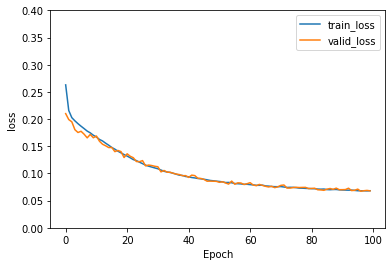

In [56]:
plotLoss(history5)

## <font color = blue>Conclusion</font>
The baseline model was developed with LSTM. One Hyperparmeter is tuned in each step and model evaluation using MAE loss was performed to check the improvement. Then the prediction was made from the best mode. The best model was selected regarding its performance on loss convergence, overfitting, and time taken to fit the model. The best model is in the last page fit with 100 epochs. The best model was used to forcast a weather for the test set and submitted the predicted value to Kaggle.

---